# Normal Distribution

# Q-1

1. Generate a Normal Distribution dataset using numpy.random.normal()
2. plot histogram and kde using seaborn.histplot() or sns.kdeplot()
3. Overlay the mean and standard deviation 
4. use scipy.stats.norm.pdf() to show bell curve()

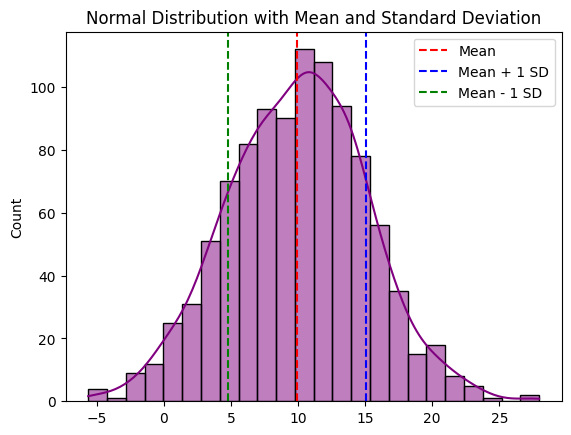

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


#1. Generate a Normal Distribution
data = np.random.normal(loc=10, scale=5, size=1000)

#2. Plot the Histogram and kde
sns.histplot(data, kde=True, color='purple')

# 3. Overlay the mean and standard deviation 
mean = np.mean(data)
sd = np.std(data)
plt.axvline(mean, color='red', linestyle='--', label='Mean')
plt.axvline(mean + sd, color='blue', linestyle='--', label='Mean + 1 SD')
plt.axvline(mean - sd, color='green', linestyle='--', label='Mean - 1 SD')
plt.title('Normal Distribution with Mean and Standard Deviation')
plt.legend()

# 4. Show bell curve()
# x = np.linspace(min(data), max(data), 100)
# plt.plot(x, norm.pdf(x,mean, sd), color='orange', label='Bell Curve')
plt.show()

## Q-2

1. Load a sample dataset and select a numeric column.
2. Calculate Q1,Q2,Q3 using numpy.percentile() or df.quantile()
3. Plot this quantiles using vertical lines or a boxplot or histogram

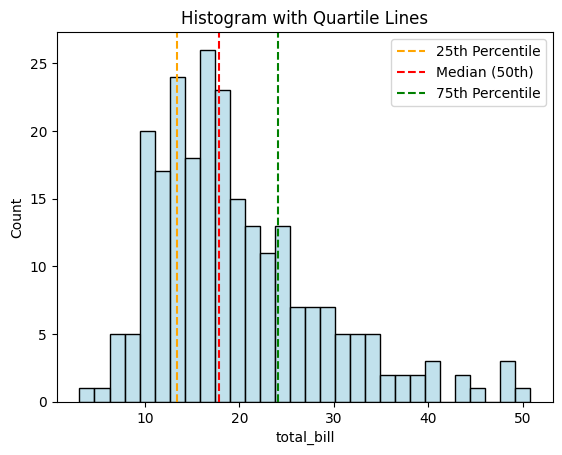

In [23]:
# Load sample dataset
df = sns.load_dataset('tips')
col = df['total_bill']

# Calculate percentiles
q25 = np.percentile(col, 25)
q50 = np.percentile(col, 50)
q75 = np.percentile(col, 75)

# Plot histogram with quartile lines
sns.histplot(col, bins=30, color='lightblue')
plt.axvline(q25, color='orange', linestyle='--', label='25th Percentile')
plt.axvline(q50, color='red', linestyle='--', label='Median (50th)')
plt.axvline(q75, color='green', linestyle='--', label='75th Percentile')
plt.legend()
plt.title("Histogram with Quartile Lines")
plt.show()


## Q-3

1. Print 5 number summary of  (min,max, Q1, Q2, Q3) 
2. create a boxplot using seaborn.boxplot() or using matplotlib
3. Identify and label outliers in the boxplot

Five-number summary:
Min: 3.07
Q1: 13.3475
Median: 17.795
Q3: 24.127499999999998
Max: 50.81


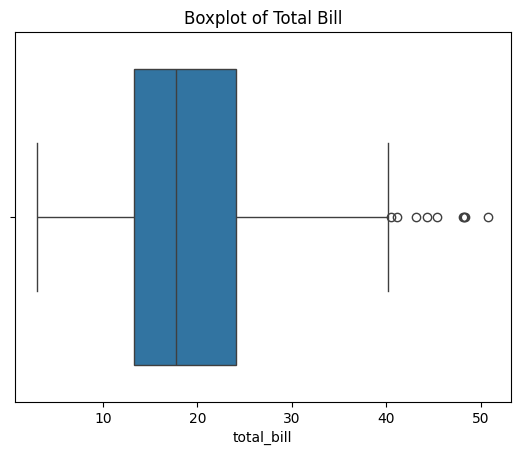

Outliers:
59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64


In [24]:
# Five-number summary
summary = col.describe(percentiles=[.25, .5, .75])
print("Five-number summary:")
print(f"Min: {summary['min']}")
print(f"Q1: {summary['25%']}")
print(f"Median: {summary['50%']}")
print(f"Q3: {summary['75%']}")
print(f"Max: {summary['max']}")

# Boxplot
sns.boxplot(x=col)
plt.title("Boxplot of Total Bill")
plt.show()

# Identify outliers
q1 = summary['25%']
q3 = summary['75%']
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = col[(col < lower_bound) | (col > upper_bound)]
print(f"Outliers:\n{outliers}")

## Q-4


In [ ]:
# Markdown cell (write this in markdown):
"""
**Inferential Statistics** involves making predictions or inferences about a population based on a sample.
**Real-world use cases** include:
- Political polling
- Clinical trials
- A/B testing in marketing
- Quality control in manufacturing
"""

# Load population dataset
population = sns.load_dataset('tips')
pop_mean = population['total_bill'].mean()

# Sampling and comparison
sample_means = []
for _ in range(100):
    sample = population.sample(n=30)
    sample_means.append(sample['total_bill'].mean())

# Visualize sample mean distribution
sns.histplot(sample_means, kde=True, color='orange')
plt.axvline(pop_mean, color='red', linestyle='--', label=f'Population Mean: {pop_mean:.2f}')
plt.title("Distribution of Sample Means")
plt.legend()
plt.show()